Лабораторна робота №4

Тема: Бінарна класифікація на основі даних Titanic

Мета: Закріпити знання, отримані під час лекції з класифікації, застосовуючи різні моделі машинного навчання для прогнозування виживання пасажирів на основі набору даних Titanic. Практичне завдання спрямоване на розвиток навичок роботи з реальними даними, підготовки даних, побудови моделей та їх оцінки.


Завдання №1 
Підготовка середовища:
1. Встановіть необхідні бібліотеки, такі як pandas, numpy, scikit-learn, matplotlib, та seaborn.
2. Завантажте набір даних Titanic з Kaggle або використайте вбудовані дані Titanic з бібліотеки seaborn.


#Встановлення бібліотек
pip install pandas numpy scikit-learn matplotlib seaborn


In [3]:
# дані Titanic з бібліоттеки seaborn
import seaborn as sns
import pandas as pd

# Завантаження набору даних Titanic
titanic_data = sns.load_dataset('titanic')

# Перевірка перших кількох рядків
print(titanic_data.head())


   survived  pclass     sex   age  sibsp  parch     fare embarked  class  \
0         0       3    male  22.0      1      0   7.2500        S  Third   
1         1       1  female  38.0      1      0  71.2833        C  First   
2         1       3  female  26.0      0      0   7.9250        S  Third   
3         1       1  female  35.0      1      0  53.1000        S  First   
4         0       3    male  35.0      0      0   8.0500        S  Third   

     who  adult_male deck  embark_town alive  alone  
0    man        True  NaN  Southampton    no  False  
1  woman       False    C    Cherbourg   yes  False  
2  woman       False  NaN  Southampton   yes   True  
3  woman       False    C  Southampton   yes  False  
4    man        True  NaN  Southampton    no   True  


Завдання №2
Ознайомлення з даними:
1. Виведіть перші 10 рядків набору даних.
2. Отримайте базову статистику за допомогою методу describe() та дослідіть пропущені значення.

In [4]:
import seaborn as sns
import pandas as pd

# Завантаження набору даних Titanic
titanic_data = sns.load_dataset('titanic')

# Виведення перших 10 рядків
print("Перші 10 рядків набору даних:")
print(titanic_data.head(10))

# Отримання базової статистики для числових даних
print("\nБазова статистика для числових даних:")
print(titanic_data.describe())

# Перевірка кількості пропущених значень у кожному стовпці
print("\nКількість пропущених значень у кожному стовпці:")
print(titanic_data.isnull().sum())


Перші 10 рядків набору даних:
   survived  pclass     sex   age  sibsp  parch     fare embarked   class  \
0         0       3    male  22.0      1      0   7.2500        S   Third   
1         1       1  female  38.0      1      0  71.2833        C   First   
2         1       3  female  26.0      0      0   7.9250        S   Third   
3         1       1  female  35.0      1      0  53.1000        S   First   
4         0       3    male  35.0      0      0   8.0500        S   Third   
5         0       3    male   NaN      0      0   8.4583        Q   Third   
6         0       1    male  54.0      0      0  51.8625        S   First   
7         0       3    male   2.0      3      1  21.0750        S   Third   
8         1       3  female  27.0      0      2  11.1333        S   Third   
9         1       2  female  14.0      1      0  30.0708        C  Second   

     who  adult_male deck  embark_town alive  alone  
0    man        True  NaN  Southampton    no  False  
1  woman      

Завдання №3
 Попередня обробка даних:
1. Визначте та обробіть пропущені значення:
У змінній Age заповніть пропуски середнім значенням.
У змінній Embarked заповніть пропуски найбільш поширеним значенням (модою).
2. Закодуйте категоріальні змінні:
Використайте One-Hot Encoding для змінних Sex та Embarked.
3. Створіть нові ознаки:
Додайте змінну FamilySize, яка буде сумою SibSp та Parch.

In [10]:
import seaborn as sns
import pandas as pd

# Завантаження набору даних Titanic
titanic_data = sns.load_dataset('titanic')

# 1. Заповнення пропусків у змінній Age середнім значенням
titanic_data['age'] = titanic_data['age'].fillna(titanic_data['age'].mean())

# 2. Заповнення пропусків у змінній Embarked найпоширенішим значенням (модою)
titanic_data['embarked'] = titanic_data['embarked'].fillna(titanic_data['embarked'].mode()[0])

# 3. One-Hot Encoding для змінних Sex та Embarked
titanic_data = pd.get_dummies(titanic_data, columns=['sex', 'embarked'], drop_first=True)

# 4. Створення нової змінної FamilySize (сума SibSp та Parch)
titanic_data['FamilySize'] = titanic_data['sibsp'] + titanic_data['parch']

# Перевірка змін
titanic_data.head(10)


,survived,pclass,age,sibsp,parch,fare,class,who,adult_male,deck,embark_town,alive,alone,sex_male,embarked_Q,embarked_S,FamilySize
0,0,3,22.000000,1,0,7.2500,Third,man,True,NaN,Southampton,no,False,True,False,True,1
1,1,1,38.000000,1,0,71.2833,First,woman,False,C,Cherbourg,yes,False,False,False,False,1
2,1,3,26.000000,0,0,7.9250,Third,woman,False,NaN,Southampton,yes,True,False,False,True,0
3,1,1,35.000000,1,0,53.1000,First,woman,False,C,Southampton,yes,False,False,False,True,1
4,0,3,35.000000,0,0,8.0500,Third,man,True,NaN,Southampton,no,True,True,False,True,0
5,0,3,29.699118,0,0,8.4583,Third,man,True,NaN,Queenstown,no,True,True,True,False,0
6,0,1,54.000000,0,0,51.8625,First,man,True,E,Southampton,no,True,True,False,True,0
7,0,3,2.000000,3,1,21.0750,Third,child,False,NaN,Southampton,no,False,True,False,True,4
8,1,3,27.000000,0,2,11.1333,Third,woman,False,NaN,Southampton,yes,False,False,False,True,2
9,1,2,14.000000,1,0,30.0708,Second,child,False,NaN,Cherbourg,yes,False,False,False,False,1


Завдання №4 
Поділ даних на тренувальну та тестову вибірки:
 1. Розділіть набір даних на тренувальну (80%) та тестову (20%) вибірки, використовуючи train_test_split() з бібліотеки scikit-learn.


In [11]:
from sklearn.model_selection import train_test_split

# Припустимо, що 'survived' є цільовою змінною (target), а всі інші змінні — ознаками (features)
X = titanic_data.drop('survived', axis=1)
y = titanic_data['survived']

# Поділ на тренувальну (80%) та тестову (20%) вибірки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Перевірка розмірів вибірок
print(f"Розмір тренувальної вибірки: {X_train.shape}")
print(f"Розмір тестової вибірки: {X_test.shape}")


Розмір тренувальної вибірки: (712, 16)
Розмір тестової вибірки: (179, 16)


Завдання №5 
1.  Побудова моделей:
Реалізуйте наступні моделі для бінарної класифікації:
Логістична регресія.
Дерева рішень.
Випадкові ліси (Random Forest).
2. Для кожної моделі виконайте:
Тренування на тренувальній вибірці.
Передбачення на тестовій вибірці.
Оцінку метрик: точність (accuracy), precision, recall, F1-score.


In [16]:
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Завантаження датасету Titanic
data = sns.load_dataset('titanic')

# Вибір ознак та мітки
X = data[['pclass', 'sex', 'age', 'fare', 'sibsp', 'parch']]
y = data['survived']

# Обробка категоріальних змінних
X = pd.get_dummies(X, drop_first=True)

# Заповнення пропущених значень у колонці 'age'
X['age'] = X['age'].fillna(X['age'].median())

# Розділення даних на тренувальну та тестову вибірки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Логістична регресія
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train, y_train)
y_pred_log_reg = log_reg.predict(X_test)

# Оцінка метрик для логістичної регресії
print("Logistic Regression Metrics:")
print("Accuracy:", accuracy_score(y_test, y_pred_log_reg))
print("Precision:", precision_score(y_test, y_pred_log_reg))
print("Recall:", recall_score(y_test, y_pred_log_reg))
print("F1-score:", f1_score(y_test, y_pred_log_reg))

# Дерева рішень
tree_model = DecisionTreeClassifier()
tree_model.fit(X_train, y_train)
y_pred_tree = tree_model.predict(X_test)

# Оцінка метрик для дерев рішень
print("\nDecision Tree Metrics:")
print("Accuracy:", accuracy_score(y_test, y_pred_tree))
print("Precision:", precision_score(y_test, y_pred_tree))
print("Recall:", recall_score(y_test, y_pred_tree))
print("F1-score:", f1_score(y_test, y_pred_tree))

# Випадкові ліси
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

# Оцінка метрик для випадкових лісів
print("\nRandom Forest Metrics:")
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print("Precision:", precision_score(y_test, y_pred_rf))
print("Recall:", recall_score(y_test, y_pred_rf))
print("F1-score:", f1_score(y_test, y_pred_rf))


Logistic Regression Metrics:
Accuracy: 0.8100558659217877
Precision: 0.803030303030303
Recall: 0.7162162162162162
F1-score: 0.7571428571428571

Decision Tree Metrics:
Accuracy: 0.7597765363128491
Precision: 0.7066666666666667
Recall: 0.7162162162162162
F1-score: 0.7114093959731543

Random Forest Metrics:
Accuracy: 0.8044692737430168
Precision: 0.76
Recall: 0.7702702702702703
F1-score: 0.7651006711409396


Завдання №6 
Оцінка результатів:
1. Побудуйте матрицю плутанини для кожної моделі.
2. Виведіть ROC-криву та AUC для кожної моделі, використовуючи методи roc_curve() та auc().


Confusion Matrix for Logistic Regression:
 [[92 13]
 [21 53]]


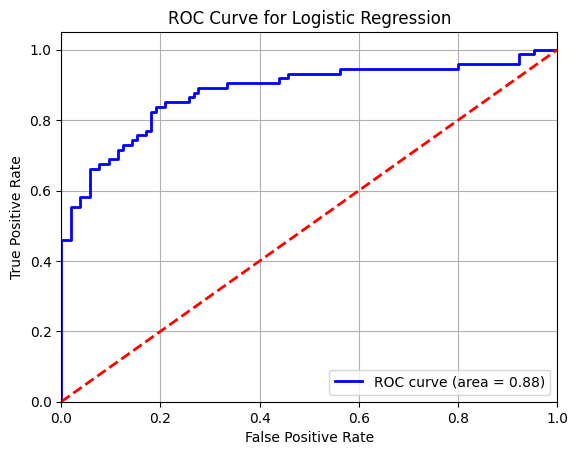

Confusion Matrix for Decision Tree:
 [[83 22]
 [21 53]]


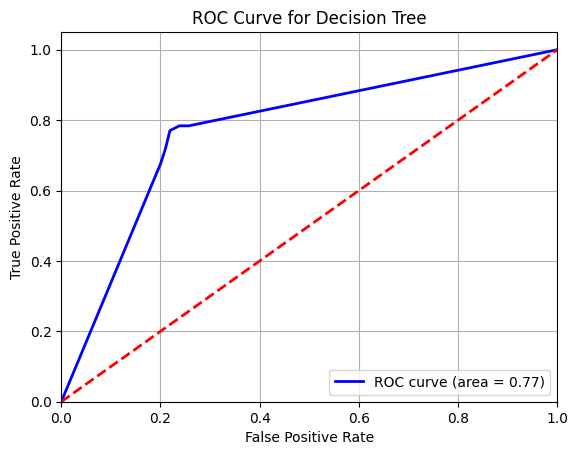

Confusion Matrix for Random Forest:
 [[87 18]
 [17 57]]


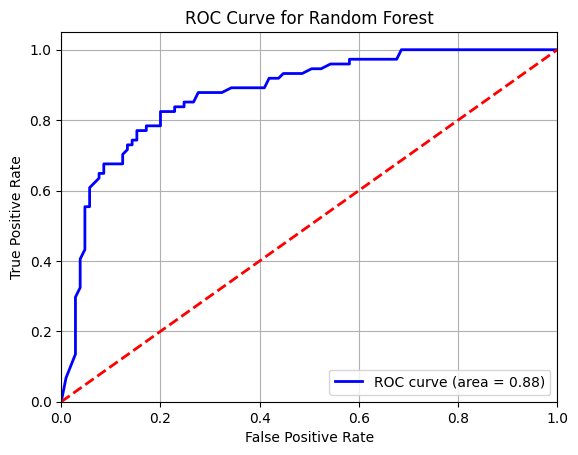

In [18]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, roc_curve, auc

# Функція для виводу результатів моделі
def evaluate_model(y_test, y_pred, y_pred_prob, model_name):
    # Матриця плутанини
    cm = confusion_matrix(y_test, y_pred)
    print(f"Confusion Matrix for {model_name}:\n", cm)

    # ROC-крива та AUC
    fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
    roc_auc = auc(fpr, tpr)

    plt.figure()
    plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'ROC Curve for {model_name}')
    plt.legend(loc="lower right")
    plt.grid()
    plt.show()

# Логістична регресія
y_pred_prob_log_reg = log_reg.predict_proba(X_test)[:, 1]  # Отримання ймовірностей
evaluate_model(y_test, y_pred_log_reg, y_pred_prob_log_reg, "Logistic Regression")

# Дерева рішень
y_pred_prob_tree = tree_model.predict_proba(X_test)[:, 1]  # Отримання ймовірностей
evaluate_model(y_test, y_pred_tree, y_pred_prob_tree, "Decision Tree")

# Випадкові ліси
y_pred_prob_rf = rf_model.predict_proba(X_test)[:, 1]  # Отримання ймовірностей
evaluate_model(y_test, y_pred_rf, y_pred_prob_rf, "Random Forest")


Завдання №7
Оптимізація моделі:
1. Виконайте крос-валідацію для логістичної регресії та дерев рішень.
2. Оптимізуйте гіперпараметри для випадкового лісу, використовуючи GridSearchCV або RandomizedSearchCV.


In [19]:
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

# Завантаження датасету Titanic
data = sns.load_dataset('titanic')

# Вибір ознак та мітки
X = data[['pclass', 'sex', 'age', 'fare', 'sibsp', 'parch']]
y = data['survived']

# Обробка категоріальних змінних
X = pd.get_dummies(X, drop_first=True)

# Заповнення пропущених значень у колонці 'age'
X['age'] = X['age'].fillna(X['age'].median())

# Розділення даних на тренувальну та тестову вибірки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Логістична регресія
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train, y_train)

# Крос-валідація для логістичної регресії
log_reg_cv_scores = cross_val_score(log_reg, X_train, y_train, cv=5)
print("Logistic Regression Cross-Validation Scores:", log_reg_cv_scores)
print("Mean Cross-Validation Score:", log_reg_cv_scores.mean())

# Дерева рішень
tree_model = DecisionTreeClassifier()
tree_model.fit(X_train, y_train)

# Крос-валідація для дерев рішень
tree_cv_scores = cross_val_score(tree_model, X_train, y_train, cv=5)
print("\nDecision Tree Cross-Validation Scores:", tree_cv_scores)
print("Mean Cross-Validation Score:", tree_cv_scores.mean())

# Оптимізація гіперпараметрів для випадкового лісу
rf_model = RandomForestClassifier()

# Визначення параметрів для GridSearchCV
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, 
                           scoring='accuracy', cv=5, n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)

# Виведення найкращих параметрів
print("\nBest parameters for Random Forest:", grid_search.best_params_)
print("Best cross-validation score:", grid_search.best_score_)


Logistic Regression Cross-Validation Scores: [0.81818182 0.79020979 0.78873239 0.73239437 0.78873239]
Mean Cross-Validation Score: 0.7836501526642371

Decision Tree Cross-Validation Scores: [0.75524476 0.72727273 0.78169014 0.78169014 0.74647887]
Mean Cross-Validation Score: 0.758475327489412
Fitting 5 folds for each of 108 candidates, totalling 540 fits

Best parameters for Random Forest: {'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 10, 'n_estimators': 200}
Best cross-validation score: 0.837043238451689


Завдання №8
Порівняння моделей:
1. Порівняйте ефективність кожної моделі на основі метрик (точність, precision, recall, F1-score) та виберіть найкращу модель.


In [23]:
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Завантаження та обробка даних
data = sns.load_dataset('titanic')
X = pd.get_dummies(data[['pclass', 'sex', 'age', 'fare', 'sibsp', 'parch']], drop_first=True)
X['age'] = X['age'].fillna(X['age'].median())
y = data['survived']

# Розділення даних
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Тренування моделей
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(n_estimators=100)
}

metrics = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    metrics[name] = {
        "Accuracy": accuracy_score(y_test, y_pred),
        "Precision": precision_score(y_test, y_pred),
        "Recall": recall_score(y_test, y_pred),
        "F1-score": f1_score(y_test, y_pred)
    }

# Створення DataFrame з результатами
results_df = pd.DataFrame(metrics).T
print(results_df)

# Визначення найкращої моделі
best_model = results_df['F1-score'].idxmax()
print(f"\nBest Model Based on F1-score: {best_model}")


                     Accuracy  Precision    Recall  F1-score
Logistic Regression  0.810056   0.803030  0.716216  0.757143
Decision Tree        0.748603   0.693333  0.702703  0.697987
Random Forest        0.798883   0.763889  0.743243  0.753425

Best Model Based on F1-score: Logistic Regression


Завдання №9
Завдання з творчим підходом:
1. Проаналізуйте важливість ознак для моделі випадкового лісу та з’ясуйте, які змінні найбільше впливають на виживання.
2. Запропонуйте власні ідеї для покращення моделі (наприклад, додавання нових ознак або удосконалення способів обробки пропущених даних).


1. У моделі випадкового лісу важливість ознак може вказати, які з них найбільше впливають на виживання пасажирів на Титаніку. Зазвичай, до важливих ознак відносять:

- Стать (sex): жінки зазвичай мали вищі шанси на виживання.
- Клас (pclass): пасажири першого класу мали вищі шанси на виживання порівняно з тими, хто їхав у другому чи третьому класі.
- Вік (age): молоді пасажири, особливо діти, часто мали вищі шанси на виживання.
- Тариф (fare): вищі тарифи могли свідчити про кращі умови, що також впливало на шанси на виживання.

2. Ідеї для покращення моделі
- Додавання нових ознак:
Сімейний статус: створення ознаки, що відображає загальну кількість родичів на борту, наприклад, об'єднуючи кількість братів/сестер і батьків/друзів.
Вік: розглянути категоризацію віку на групи, щоб краще відобразити ризик для різних вікових категорій (наприклад, діти, молодь, дорослі, літні).
- Покращення обробки пропущених даних:
Використання методів для заповнення пропущених значень, таких як кластеризація, що дозволяє заповнювати дані на основі схожості з іншими пасажирами.
Впровадження більш адаптивних методів заповнення, як-от використання середнього або медіанного значення, зважених за важливими ознаками.
- Агрегація ознак:
Об’єднання схожих ознак для створення нових, наприклад, об’єднати інформацію про родичів і створити загальну змінну для сімейного статусу.
- Використання більш складних моделей:
Розглянути моделі, що підтримують нелінійні зв'язки, такі як градієнтний бустинг або нейронні мережі.
- Оптимізація гіперпараметрів:
Використання методів, таких як RandomizedSearchCV або GridSearchCV, для підбору найкращих гіперпараметрів моделей, що може підвищити їхню продуктивність.

Висновок: у цій лабораторній роботі я закріпила знання, отримані під час лекції з класифікації, застосовуючи різні моделі машинного навчання для прогнозування виживання пасажирів на основі набору даних Titanic. 
